# Project - Movielens Case Study

# For this project we are using Google Colab as the dataset is very huge and some models will consume most of the CPU RAM during analysis 

In [2]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# import the three datasets
movies = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/movies.dat',sep='::',header=None,names=['MovieID','Title','Genres'])
ratings = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ratings.dat',sep="::",header=None,names=['UserID','MovieID','Rating','Timestamp'])
users = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/users.dat',sep="::",header=None,names=['UserID','Gender','Age','Occupation','Zip-code'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel 

In [5]:
# check shapes of datasets
print(movies.shape)
print(ratings.shape)
print(users.shape)

(3883, 3)
(1000209, 4)
(6040, 5)


In [6]:
movies.head() # first 5 records

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
ratings.head() # first 5 records

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
users.head() # first 5 records

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [9]:
# Check the datatypes of data
print(movies.dtypes)
print(ratings.dtypes)
print(users.dtypes)

MovieID     int64
Title      object
Genres     object
dtype: object
UserID       int64
MovieID      int64
Rating       int64
Timestamp    int64
dtype: object
UserID         int64
Gender        object
Age            int64
Occupation     int64
Zip-code      object
dtype: object


In [9]:
# Check for na values in movies
movies.isnull().sum().sort_values(ascending=False)

Genres     0
Title      0
MovieID    0
dtype: int64

In [10]:
# check for na values in ratings
ratings.isnull().sum().sort_values(ascending=False)

Timestamp    0
Rating       0
MovieID      0
UserID       0
dtype: int64

In [11]:
# check for na values in users
users.isnull().sum().sort_values(ascending=False)

Zip-code      0
Occupation    0
Age           0
Gender        0
UserID        0
dtype: int64

# There are no missing values in the dataset

# Analysis Task - Create a new dataset [Master_Data]

In [10]:
# Merging the 3 datasets to create a Master_Data
data = pd.merge(movies,ratings,on='MovieID')
Master_Data = pd.merge(data,users,on='UserID')

In [13]:
Master_Data.head() # first 5 records

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [14]:
# to get number of rows and columns
Master_Data.shape

(1000209, 10)

In [15]:
Master_Data.dtypes # check the datatypes

MovieID        int64
Title         object
Genres        object
UserID         int64
Rating         int64
Timestamp      int64
Gender        object
Age            int64
Occupation     int64
Zip-code      object
dtype: object

In [16]:
Master_Data.isnull().sum().sort_values(ascending=False) # check for missing values

Zip-code      0
Occupation    0
Age           0
Gender        0
Timestamp     0
Rating        0
UserID        0
Genres        0
Title         0
MovieID       0
dtype: int64

# There are no missing values in the Master_Data

# Explore the datasets using visual representations

# 1. User Age Distribution

In [17]:
# creating a variable for age
age_data = Master_Data['Age']

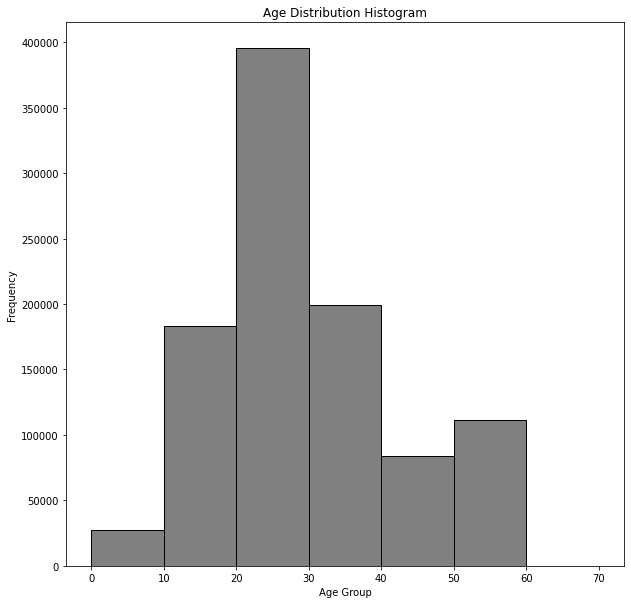

In [18]:
# Let's create a Histogram of Age Distribution
plt.figure(figsize=(10,10))
plt.hist(age_data,bins=[0,10,20,30,40,50,60,70],color='grey',edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Age Distribution Histogram')
plt.grid(False)
plt.show()

# From above histogram we found that the Master_Data has people from age group 20-30 who contribute highest and people from age group 0-10 who contribute lowest when it comes to watch movies and also the movie ratings

# 2. User rating of the movie “Toy Story”

In [19]:
# Lets check for unique movie titles
Unique_Titles = Master_Data.Title.unique()
Unique_Titles

array(['Toy Story (1995)', 'Pocahontas (1995)', 'Apollo 13 (1995)', ...,
       'Voyage to the Beginning of the World (1997)',
       'Project Moon Base (1953)', "Heaven's Burning (1997)"],
      dtype=object)

In [20]:
# check for toy story 
Toy_Story = []
for i in Unique_Titles:
    if i.startswith('Toy Story')==True:
        Toy_Story.append(i)
print(Toy_Story)

['Toy Story (1995)', 'Toy Story 2 (1999)']


# from above analysis we can see that there are two toy story movies : 'Toy Story (1995)', 'Toy Story 2 (1999)'

In [21]:
# Creating a separate data for the two toy sory versions
ToyStory1995 = Master_Data[Master_Data.Title=='Toy Story (1995)']
ToyStory1999 = Master_Data[Master_Data.Title=='Toy Story 2 (1999)']

In [22]:
# Now we will group Toy Story 1995 by ratings count the how many users provided the ratings
TS1995 = ToyStory1995.groupby('Rating')['UserID'].count()
TS1995

Rating
1     16
2     61
3    345
4    835
5    820
Name: UserID, dtype: int64

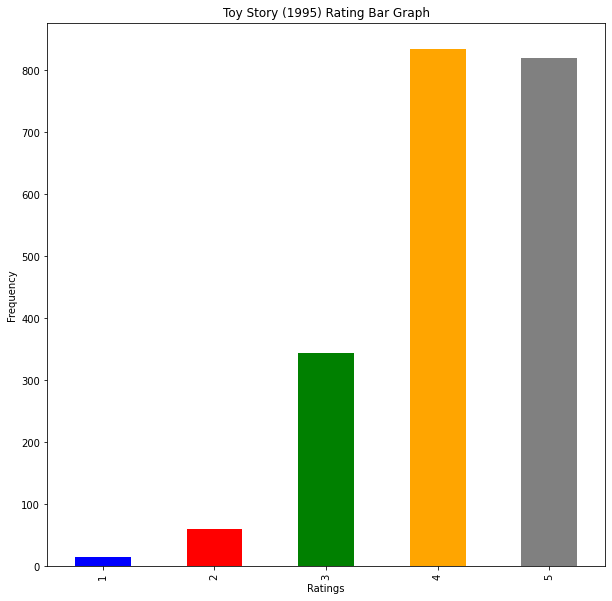

In [23]:
# Lets create a Bar Graph of Toy Story (1995) Rating
plt.figure(figsize=(10,10))
TS1995.plot(kind='bar',color=['blue','red','green','orange','grey'])
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Toy Story (1995) Rating Bar Graph')
plt.show()

# From above analysis we can see that for Toy Story 1995 maximum users gave rating 5 and minimum as rating 1

In [24]:
# Now we will group Toy Story 1999 by ratings count the how many users provided the ratings
TS1999 = ToyStory1999.groupby('Rating')['UserID'].count()
TS1999

Rating
1     25
2     44
3    214
4    578
5    724
Name: UserID, dtype: int64

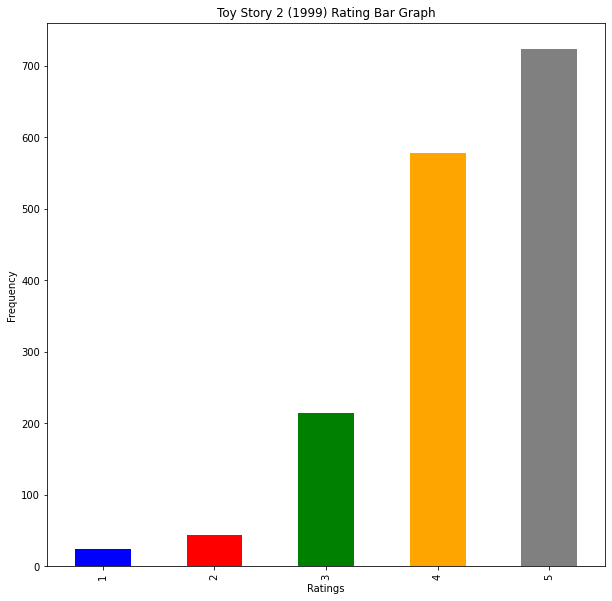

In [25]:
# Lets create a Bar Graph of Toy Story (1995) Rating
plt.figure(figsize=(10,10))
TS1999.plot(kind='bar',color=['blue','red','green','orange','grey'])
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Toy Story 2 (1999) Rating Bar Graph')
plt.show()

# From above analysis we can see that for Toy Story 1999 maximum users gave rating 5 and minimum as rating 1

# 3. Top 25 movies by viewership rating

In [26]:
# Creating data for top 25 movies with higest number of ratings count
Top25 = Master_Data.groupby('Title')['Rating'].count().nlargest(25)
Top25

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

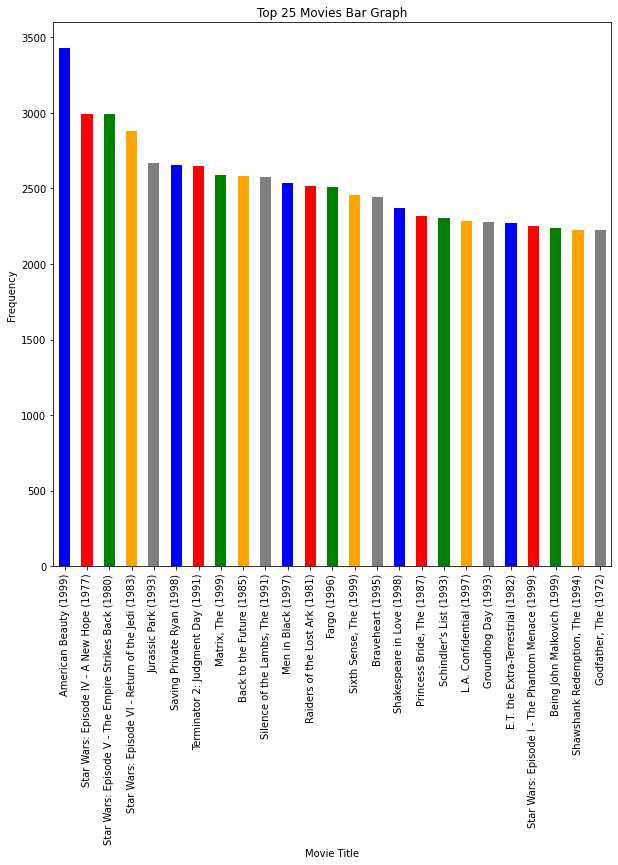

In [27]:
# Creating a Bar Graph of Top 25 Movies
plt.figure(figsize=(10,10))
Top25.plot(kind='bar',color = ['blue','red','green','orange','grey'])
plt.xlabel('Movie Title')
plt.ylabel('Frequency')
plt.title('Top 25 Movies Bar Graph')
plt.show()

# From above analysis American Beauty (1999) has highest number of ratings and Godfather, The (1972) has lowest number of ratings

# 4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [28]:
# Creating a data for user 2696
user_2696 = Master_Data[Master_Data.UserID==2696]
user_2696

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


In [29]:
# Now we will group data by rating and its counts
user2696 = user_2696.groupby('Rating')['UserID'].count()
user2696

Rating
1     2
2     3
3     3
4    11
5     1
Name: UserID, dtype: int64

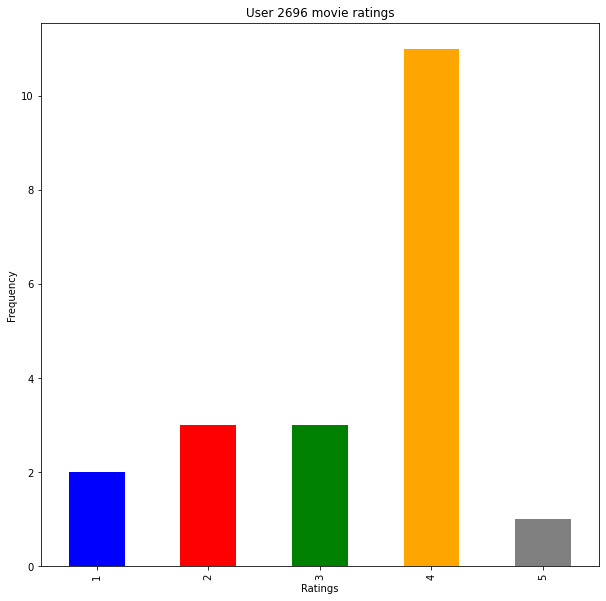

In [30]:
# Creating a Bar Graph of User 2696 movie ratings
plt.figure(figsize=(10,10))
user2696.plot(kind='bar',color = ['blue','red','green','orange','grey'])
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('User 2696 movie ratings')
plt.show()

# From above analysis we can see that user 2696 gave maximum number of rating 4 and minimum number of rating 5 to the movies he watched

# Feature Engineering

# 1. Find out all the unique genres

In [31]:
# checking of counts of each genre
Master_Data.Genres.value_counts()

Comedy                       116883
Drama                        111423
Comedy|Romance                42712
Comedy|Drama                  42245
Drama|Romance                 29170
                              ...  
Drama|Romance|Western            29
Children's|Fantasy               27
Comedy|Film-Noir|Thriller         5
Film-Noir|Horror                  2
Fantasy                           1
Name: Genres, Length: 301, dtype: int64

In [32]:
Master_Data.Genres.unique() # get unique names of genres

array(["Animation|Children's|Comedy",
       "Animation|Children's|Musical|Romance", 'Drama',
       'Action|Adventure|Fantasy|Sci-Fi', 'Drama|War', "Children's|Drama",
       "Animation|Children's|Comedy|Musical",
       "Animation|Children's|Musical", 'Crime|Drama|Thriller',
       'Animation', 'Animation|Comedy|Thriller', 'Musical|Romance',
       "Adventure|Children's|Drama|Musical", 'Musical',
       "Children's|Comedy|Musical", "Children's|Drama|Fantasy|Sci-Fi",
       'Action|Adventure|Comedy|Romance', 'Comedy|Sci-Fi',
       'Action|Adventure|Drama',
       "Adventure|Animation|Children's|Comedy|Musical", 'Drama|Romance',
       "Animation|Children's", 'Action|Drama|War', 'Comedy', 'Romance',
       'Action|Crime|Romance', 'Thriller', 'Comedy|Fantasy',
       'Comedy|Drama', "Children's|Comedy|Drama", 'Drama|Musical',
       'Drama|Romance|War|Western', 'Crime|Drama',
       'Action|Comedy|Western', 'Action|Romance|Thriller', 'Western',
       "Children's|Comedy", 'Adventure|Dr

# 2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.

In [33]:
Genres_data = Master_Data['Genres']
Genres_data = Genres_data.str.get_dummies().add_prefix('Genre_')
Genres_data.head()

,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


# So we have created a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre

In [34]:
Genres_data.shape # to check for rows and columns

(1000209, 18)

In [35]:
Master_Data.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code'],
      dtype='object')

In [36]:
# Lets create a duplicate of Master_Data with selected columns
Movie_data = Master_Data[['MovieID', 'Title', 'UserID', 'Rating', 'Gender','Age', 'Occupation']]

In [37]:
Movie_data_final = pd.concat([Movie_data,Genres_data],axis=1)
Movie_data_final.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,1,Toy Story (1995),1,5,F,1,10,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),1,5,F,1,10,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),1,5,F,1,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,F,1,10,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),1,5,F,1,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


# We have combined the genres_data with Movie_data with selected number of columns

# 3. Determine the features affecting the ratings of any particular movie.

In [11]:
Master_Data.head() # first 5 records

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [12]:
Master_Data.dtypes # check datatypes

MovieID        int64
Title         object
Genres        object
UserID         int64
Rating         int64
Timestamp      int64
Gender        object
Age            int64
Occupation     int64
Zip-code      object
dtype: object

In [13]:
# converting Zip-code to string datatype
Master_Data['Zip-code'] = Master_Data['Zip-code'].astype(str)

In [14]:
# Now we will convert Zip-code to float for further analysis
Master_Data['Zip-code'] = Master_Data['Zip-code'].str.replace('-', '_').astype(float)

In [15]:
# Creating separate data for object columns and numeric columns
objectcols = Master_Data[['Title','Genres','Gender']]
numericcols = Master_Data.drop(['Title','Genres','Gender'],axis=1)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
# Creating dummy of objectcols for further analysis
objectcolsdummy = objectcols.apply(le.fit_transform)
objectcolsdummy.head()

,Title,Genres,Gender
0,3411,145,0
1,2598,153,0
2,195,239,0
3,3153,24,0
4,2901,262,0


In [18]:
# combining the data to form a final data for analysis
Master_Data_final = pd.concat([numericcols,objectcolsdummy],axis=1)
Master_Data_final.head()

,MovieID,UserID,Rating,Timestamp,Age,Occupation,Zip-code,Title,Genres,Gender
0,1,1,5,978824268,1,10,48067.0,3411,145,0
1,48,1,5,978824351,1,10,48067.0,2598,153,0
2,150,1,5,978301777,1,10,48067.0,195,239,0
3,260,1,4,978300760,1,10,48067.0,3153,24,0
4,527,1,5,978824195,1,10,48067.0,2901,262,0


In [19]:
Master_Data_final.shape # rows and columns

(1000209, 10)

In [20]:
Master_Data_final.dtypes # check datatypes

MovieID         int64
UserID          int64
Rating          int64
Timestamp       int64
Age             int64
Occupation      int64
Zip-code      float64
Title           int64
Genres          int64
Gender          int64
dtype: object

# As our data is very huge i.e 1000209 rows we will split it into 4 parts and then we will perform analysis on the data¶

In [21]:
# Separating data into 4 parts for easy analysis
Master_Data_final1 = Master_Data_final.iloc[0:250000,:]
Master_Data_final2 = Master_Data_final.iloc[250000:500000,:]
Master_Data_final3 = Master_Data_final.iloc[500001:750001,:]
Master_Data_final4 = Master_Data_final.iloc[750001:1000210,:]

In [22]:
# Check shapes of each part
print(Master_Data_final1.shape)
print(Master_Data_final2.shape)
print(Master_Data_final3.shape)
print(Master_Data_final4.shape)

(250000, 10)
(250000, 10)
(250000, 10)
(250208, 10)


In [23]:
# import the required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Master_Data_final1

In [52]:
# Dependent (y1) and Independent (X1) variables
y1 = Master_Data_final1.Rating
X1 = Master_Data_final1.drop(['Rating'],axis=1)

In [53]:
# Split the data into train and test
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.25,random_state=42)

In [54]:
# Check shapes
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(187500, 9)
(62500, 9)
(187500,)
(62500,)


In [56]:
# Linear Regression Model
print('Linear Regression :')
print()
linreg = LinearRegression()
linregmodel = linreg.fit(X1_train,y1_train)
regpredict = linregmodel.predict(X1_test)
print('Model Score :',linregmodel.score(X1_train,y1_train)*100)
print('Mean Absolute Error :',mean_absolute_error(y1_test,regpredict))
print('Mean Squared Error :',mean_squared_error(y1_test,regpredict))
print('Root Mean Square Error :',np.sqrt(mean_squared_error(y1_test,regpredict)))

Linear Regression :

Accuracy:  1.014979655349313
Mean Absolute Error : 0.9307692688456111
Mean Squared Error : 1.2418534132439387
Root Mean Square Error : 1.1143847689393187


In [57]:
# Decision Tree Model
print('Decision Tree Model :')
print()
tree = DecisionTreeRegressor()
treemodel = tree.fit(X1_train,y1_train)
treepredict = treemodel.predict(X1_test)
print('Model Score :',treemodel.score(X1_train,y1_train)*100)
print('Mean Absolute Error :',mean_absolute_error(y1_test,treepredict))
print('Mean Squared Error :',mean_squared_error(y1_test,treepredict))
print('Root Mean Square Error :',np.sqrt(mean_squared_error(y1_test,treepredict)))

Decision Tree Model :

Model Score : 100.0
Mean Absolute Error : 0.997232
Mean Squared Error : 1.80968
Root Mean Square Error : 1.3452434723870619


In [59]:
# Random Forest Model
print('Random Forest Model :')
print()
rf = RandomForestRegressor(n_estimators=500)
rfmodel = rf.fit(X1_train,y1_train)
rfpredict = rfmodel.predict(X1_test)
print('Model Score :',rfmodel.score(X1_train,y1_train)*100)
print('Mean Absolute Error :',mean_absolute_error(y1_test,rfpredict))
print('Mean Squared Error :',mean_squared_error(y1_test,rfpredict))
print('Root Mean Square Error :',np.sqrt(mean_squared_error(y1_test,rfpredict)))

Random Forest Model :

Model Score : 89.9209659700578
Mean Absolute Error : 0.7650695679999999
Mean Squared Error : 0.918656814464
Root Mean Square Error : 0.9584658650489333


In [60]:
# Gradient Boosting Model
print('Gradient Boosting Model :')
print()
gbr = GradientBoostingRegressor(n_estimators=500)
gbrmodel = gbr.fit(X1_train,y1_train)
gbrpredict = gbrmodel.predict(X1_test)
print('Model Score :',gbrmodel.score(X1_train,y1_train)*100)
print('Mean Absolute Error :',mean_absolute_error(y1_test,gbrpredict))
print('Mean Squared Error :',mean_squared_error(y1_test,gbrpredict))
print('Root Mean Square Error :',np.sqrt(mean_squared_error(y1_test,gbrpredict)))

Gradient Boosting Model :

Model Score : 23.55457086776539
Mean Absolute Error : 0.7943017533257478
Mean Squared Error : 0.9631827002018266
Root Mean Square Error : 0.9814187180820563


In [61]:
# Factors affecting ratings
print(list(zip(X1_train.columns,rfmodel.feature_importances_)))

[('MovieID', 0.1594805969612773), ('UserID', 0.1400025188072164), ('Timestamp', 0.17740815432847604), ('Age', 0.0532542997481916), ('Occupation', 0.08420693074027762), ('Zip-code', 0.16722081823278828), ('Title', 0.11329962973714408), ('Genres', 0.08743745638666045), ('Gender', 0.01768959505796832)]


# Master_Data_final2

In [62]:
# Dependent (y2) and Independent (X2) variables
y2 = Master_Data_final2.Rating
X2 = Master_Data_final2.drop(['Rating'],axis=1)

In [63]:
# Split the data into train and test
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.25,random_state=42)

In [64]:
# Check shapes
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(187500, 9)
(62500, 9)
(187500,)
(62500,)


In [65]:
# Linear Regression Model
print('Linear Regression :')
print()
linreg2 = LinearRegression()
linregmodel2 = linreg2.fit(X2_train,y2_train)
regpredict2 = linregmodel2.predict(X2_test)
print('Model Score :',linregmodel2.score(X2_train,y2_train)*100)
print('Mean Absolute Error :',mean_absolute_error(y2_test,regpredict2))
print('Mean Squared Error :',mean_squared_error(y2_test,regpredict2))
print('Root Mean Square Error :',np.sqrt(mean_squared_error(y2_test,regpredict2)))

Linear Regression :

Model Score : 1.3013223981213073
Mean Absolute Error : 0.9087647893596562
Mean Squared Error : 1.197846440036141
Root Mean Square Error : 1.094461712457837


In [66]:
# Decision Tree Model
print('Decision Tree Model :')
print()
tree2 = DecisionTreeRegressor()
treemodel2 = tree2.fit(X2_train,y2_train)
treepredict2 = treemodel2.predict(X2_test)
print('Model Score :',treemodel.score(X2_train,y2_train)*100)
print('Mean Absolute Error :',mean_absolute_error(y2_test,treepredict2))
print('Mean Squared Error :',mean_squared_error(y2_test,treepredict2))
print('Root Mean Square Error :',np.sqrt(mean_squared_error(y2_test,treepredict2)))

Decision Tree Model :

Model Score : -85.05815208989615
Mean Absolute Error : 0.9864
Mean Squared Error : 1.786944
Root Mean Square Error : 1.3367662473297268


In [67]:
# Random Forest Model
print('Random Forest Model :')
print()
rf2 = RandomForestRegressor(n_estimators=500)
rfmodel2 = rf2.fit(X2_train,y2_train)
rfpredict2 = rfmodel2.predict(X2_test)
print('Model Score :',rfmodel2.score(X2_train,y2_train)*100)
print('Mean Absolute Error :',mean_absolute_error(y2_test,rfpredict2))
print('Mean Squared Error :',mean_squared_error(y2_test,rfpredict2))
print('Root Mean Square Error :',np.sqrt(mean_squared_error(y2_test,rfpredict2)))

Random Forest Model :

Model Score : 89.92045546838978
Mean Absolute Error : 0.748560128
Mean Squared Error : 0.8902996811520001
Root Mean Square Error : 0.9435569305304264


In [68]:
# Gradient Boosting Model
print('Gradient Boosting Model :')
print()
gbr2 = GradientBoostingRegressor(n_estimators=500)
gbrmodel2 = gbr2.fit(X2_train,y2_train)
gbrpredict2 = gbrmodel2.predict(X2_test)
print('Model Score :',gbrmodel.score(X2_train,y2_train)*100)
print('Mean Absolute Error :',mean_absolute_error(y2_test,gbrpredict2))
print('Mean Squared Error :',mean_squared_error(y2_test,gbrpredict2))
print('Root Mean Square Error :',np.sqrt(mean_squared_error(y2_test,gbrpredict2)))

Gradient Boosting Model :

Model Score : 6.155743858535578
Mean Absolute Error : 0.785011842000925
Mean Squared Error : 0.9481626993842109
Root Mean Square Error : 0.9737364630043444


In [69]:
# Factors affecting ratings
print(list(zip(X2_train.columns,rfmodel2.feature_importances_)))

[('MovieID', 0.1566481026607614), ('UserID', 0.12916771619660924), ('Timestamp', 0.18403964498310527), ('Age', 0.054006355249512895), ('Occupation', 0.08379752671074138), ('Zip-code', 0.1694402230421053), ('Title', 0.11775044094636383), ('Genres', 0.08723560052227808), ('Gender', 0.01791438968852271)]


# Master_Data_final3

In [24]:
# Dependent (y3) and Independent (X3) variables
y3 = Master_Data_final3.Rating
X3 = Master_Data_final3.drop(['Rating'],axis=1)

In [25]:
# Split the data into train and test
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,test_size=0.25,random_state=42)

In [26]:
# Check shapes
print(X3_train.shape)
print(X3_test.shape)
print(y3_train.shape)
print(y3_test.shape)

(187500, 9)
(62500, 9)
(187500,)
(62500,)


In [27]:
# Linear Regression Model
print('Linear Regression :')
print()
linreg3 = LinearRegression()
linregmodel3 = linreg3.fit(X3_train,y3_train)
regpredict3 = linregmodel3.predict(X3_test)
print('Model Score :',linregmodel3.score(X3_train,y3_train)*100)
print('Mean Absolute Error :',mean_absolute_error(y3_test,regpredict3))
print('Mean Squared Error :',mean_squared_error(y3_test,regpredict3))
print('Root Mean Square Error :',np.sqrt(mean_squared_error(y3_test,regpredict3)))

Linear Regression :

Model Score : 1.1120603235960647
Mean Absolute Error : 0.9379769486198766
Mean Squared Error : 1.2641260495382158
Root Mean Square Error : 1.124333602423327


In [28]:
# Decision Tree Model
print('Decision Tree Model :')
print()
tree3 = DecisionTreeRegressor()
treemodel3 = tree3.fit(X3_train,y3_train)
treepredict3 = treemodel3.predict(X3_test)
print('Model Score :',treemodel3.score(X3_train,y3_train)*100)
print('Mean Absolute Error :',mean_absolute_error(y3_test,treepredict3))
print('Mean Squared Error :',mean_squared_error(y3_test,treepredict3))
print('Root Mean Square Error :',np.sqrt(mean_squared_error(y3_test,treepredict3)))

Decision Tree Model :

Model Score : 100.0
Mean Absolute Error : 1.016304
Mean Squared Error : 1.878384
Root Mean Square Error : 1.370541498824461


In [29]:
# Random Forest Model
print('Random Forest Model :')
print()
rf3 = RandomForestRegressor(n_estimators=500)
rfmodel3 = rf3.fit(X3_train,y3_train)
rfpredict3 = rfmodel3.predict(X3_test)
print('Model Score :',rfmodel3.score(X3_train,y3_train)*100)
print('Mean Absolute Error :',mean_absolute_error(y3_test,rfpredict3))
print('Mean Squared Error :',mean_squared_error(y3_test,rfpredict3))
print('Root Mean Square Error :',np.sqrt(mean_squared_error(y3_test,rfpredict3)))

Random Forest Model :

Model Score : 89.8273094297585
Mean Absolute Error : 0.78138512
Mean Squared Error : 0.9572246026879998
Root Mean Square Error : 0.9783785579661892


In [30]:
# Gradient Boosting Model
print('Gradient Boosting Model :')
print()
gbr3 = GradientBoostingRegressor(n_estimators=500)
gbrmodel3 = gbr3.fit(X3_train,y3_train)
gbrpredict3 = gbrmodel3.predict(X3_test)
print('Model Score :',gbrmodel3.score(X3_train,y3_train)*100)
print('Mean Absolute Error :',mean_absolute_error(y3_test,gbrpredict3))
print('Mean Squared Error :',mean_squared_error(y3_test,gbrpredict3))
print('Root Mean Square Error :',np.sqrt(mean_squared_error(y3_test,gbrpredict3)))

Gradient Boosting Model :

Model Score : 22.22118061851466
Mean Absolute Error : 0.8144027167114244
Mean Squared Error : 1.007279449712804
Root Mean Square Error : 1.00363312505756


In [31]:
# Factors affecting ratings
print(list(zip(X3_train.columns,rfmodel3.feature_importances_)))

[('MovieID', 0.1563262701429214), ('UserID', 0.13025379487269634), ('Timestamp', 0.1660020630569722), ('Age', 0.05970719213176132), ('Occupation', 0.0935707813073586), ('Zip-code', 0.17630721863573232), ('Title', 0.11138721788335078), ('Genres', 0.08795402387604936), ('Gender', 0.01849143809315779)]


# Master_Data_final4

In [32]:
# Dependent (y4) and Independent (X4) variables
y4 = Master_Data_final4.Rating
X4 = Master_Data_final4.drop(['Rating'],axis=1)

In [33]:
# Split the data into train and test
X4_train,X4_test,y4_train,y4_test = train_test_split(X4,y4,test_size=0.25,random_state=42)

In [34]:
# Check shapes
print(X4_train.shape)
print(X4_test.shape)
print(y4_train.shape)
print(y4_test.shape)

(187656, 9)
(62552, 9)
(187656,)
(62552,)


In [35]:
# Linear Regression Model
print('Linear Regression :')
print()
linreg4 = LinearRegression()
linregmodel4 = linreg4.fit(X4_train,y4_train)
regpredict4 = linregmodel4.predict(X4_test)
print('Model Score :',linregmodel4.score(X4_train,y4_train)*100)
print('Mean Absolute Error :',mean_absolute_error(y4_test,regpredict4))
print('Mean Squared Error :',mean_squared_error(y4_test,regpredict4))
print('Root Mean Square Error :',np.sqrt(mean_squared_error(y4_test,regpredict4)))

Linear Regression :

Model Score : 1.8155346469467482
Mean Absolute Error : 0.888265978319701
Mean Squared Error : 1.1949406683917985
Root Mean Square Error : 1.0931334174709866


In [36]:
# Decision Tree Model
print('Decision Tree Model :')
print()
tree4 = DecisionTreeRegressor()
treemodel4 = tree4.fit(X4_train,y4_train)
treepredict4 = treemodel4.predict(X4_test)
print('Model Score :',treemodel4.score(X4_train,y4_train)*100)
print('Mean Absolute Error :',mean_absolute_error(y4_test,treepredict4))
print('Mean Squared Error :',mean_squared_error(y4_test,treepredict4))
print('Root Mean Square Error :',np.sqrt(mean_squared_error(y4_test,treepredict4)))

Decision Tree Model :

Model Score : 100.0
Mean Absolute Error : 1.0161465660570406
Mean Squared Error : 1.8993157692799592
Root Mean Square Error : 1.3781566562912793


In [37]:
# Random Forest Model
print('Random Forest Model :')
print()
rf4 = RandomForestRegressor(n_estimators=500)
rfmodel4 = rf4.fit(X4_train,y4_train)
rfpredict4 = rfmodel4.predict(X4_test)
print('Model Score :',rfmodel4.score(X4_train,y4_train)*100)
print('Mean Absolute Error :',mean_absolute_error(y4_test,rfpredict4))
print('Mean Squared Error :',mean_squared_error(y4_test,rfpredict4))
print('Root Mean Square Error :',np.sqrt(mean_squared_error(y4_test,rfpredict4)))

Random Forest Model :

Model Score : 89.07661056298622
Mean Absolute Error : 0.7861571812252207
Mean Squared Error : 0.9741089017777209
Root Mean Square Error : 0.9869695546356639


In [38]:
# Gradient Boosting Model
print('Gradient Boosting Model :')
print()
gbr4 = GradientBoostingRegressor(n_estimators=500)
gbrmodel4 = gbr4.fit(X4_train,y4_train)
gbrpredict4 = gbrmodel4.predict(X4_test)
print('Model Score :',gbrmodel4.score(X4_train,y4_train)*100)
print('Mean Absolute Error :',mean_absolute_error(y4_test,gbrpredict4))
print('Mean Squared Error :',mean_squared_error(y4_test,gbrpredict4))
print('Root Mean Square Error :',np.sqrt(mean_squared_error(y4_test,gbrpredict4)))

Gradient Boosting Model :

Model Score : 17.841000798708762
Mean Absolute Error : 0.8120149292123968
Mean Squared Error : 1.0143197795740913
Root Mean Square Error : 1.0071344396723265


In [39]:
# Factors affecting ratings
print(list(zip(X4_train.columns,rfmodel4.feature_importances_)))

[('MovieID', 0.14284055370022072), ('UserID', 0.13526504905604206), ('Timestamp', 0.16084878462274965), ('Age', 0.062125497458700885), ('Occupation', 0.1009485779110867), ('Zip-code', 0.19882355699997728), ('Title', 0.10382248354132333), ('Genres', 0.07544890129958216), ('Gender', 0.01987659541031733)]


# From above analysis we found that the Random Forest is the best model to predict ratings and MovieID, UserID, Timestamp, Zip-code,Title are the main factors that affect ratings

# Summary :
# 1. People from age group 20-30 contribute more and age group 0-10 contribute less towards watching movies
# 2. Both Toy Story 1995 and Toy Story 1999 has maximum rating given as 5 and lowest as 1
# 3. American Beauty (1999) has highest number of ratings and Godfather, The (1972) has lowest number of ratings
# 4. User 2696 gave maximum number of rating 4 and minimum number of rating 5 to the movies he watched
# 5. We created a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre
# 6. Random Forest is the best model to predict ratings and MovieID, UserID, Timestamp, Zip-code,Title are the main factors that affect ratings